In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import circuit_simulator as cs

In [5]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import tensornetwork as tn

Calculating overlap with $|0\rangle$ is linear

In [5]:
%timeit cs.sample_process(5)

3.84 ms ± 56.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit cs.sample_process(10)

9.88 ms ± 735 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%timeit cs.sample_process(50)

62.7 ms ± 7.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%timeit cs.sample_process(100)

117 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%timeit cs.sample_process(500)

556 ms ± 74.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%timeit cs.sample_process(1000)

996 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Calculating overlap with every part is quadratic (although it is possible to speed it up to $O(n \log n)$)

In [6]:
%timeit len(cs.sample_all_qubits(10))

31.7 ms ± 681 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%timeit len(cs.sample_all_qubits(20))

105 ms ± 6.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%timeit len(cs.sample_all_qubits(40))

364 ms ± 3.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit len(cs.sample_all_qubits(80))

1.44 s ± 52.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%timeit len(cs.sample_all_qubits(160))

5.8 s ± 303 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We can speed this up to $O(n\log n)$

In [7]:
%timeit len(cs.sample_all_qubits_faster(10))

22 ms ± 366 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%timeit len(cs.sample_all_qubits_faster(20))

48.9 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%timeit len(cs.sample_all_qubits_faster(40))

103 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
%timeit len(cs.sample_all_qubits_faster(80))

223 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%timeit len(cs.sample_all_qubits_faster(160))

513 ms ± 25.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%timeit len(cs.sample_all_qubits_faster(320))

1.06 s ± 24.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%timeit len(cs.sample_all_qubits_faster(640))

2.5 s ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Verifying against cirq


In [219]:
import cirq

In [220]:
simulator = cirq.Simulator()

In [226]:
n_qubits = 10

In [227]:
l = cs.sample_ladder(n_qubits)

In [228]:
lp = [cirq.ops.matrix_gates.TwoQubitMatrixGate(g)(cirq.LineQubit(p[0]), cirq.LineQubit(p[1])) for p, g in l]

In [229]:
c2 = cirq.Circuit(lp[:(n_qubits - 1)])
c2 = c2 + cirq.inverse(c2[:-1])

In [230]:
%timeit r = simulator.simulate(c2)

2.75 ms ± 77 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [231]:
r = simulator.simulate(c2)

In [237]:
def benchmark_cirq(n_qubits, r):
    probs = []
    for i in range(n_qubits):
        p = r.density_matrix_of([cirq.LineQubit(i)])[0,0]
        probs.append(p)
    return probs
def benchmark_mps(n_qubits, m):
    probs = cs.get_all_probabilities(m.copy())
    return probs
def benchmark_mps_faster(n_qubits, m):
    probs = cs.get_all_probabilities_faster(m.copy())
    return probs

In [233]:
%timeit benchmark_cirq(n_qubits, r)

688 µs ± 7.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [234]:
benchmark_cirq(n_qubits, r)

[(0.79746825+0j),
 (0.8027406+0j),
 (0.79682654+0j),
 (0.7654194+0j),
 (0.7118679+0j),
 (0.6453194+0j),
 (0.5618453+0j),
 (0.44501093+0j),
 (0.1531996+0j),
 (0.36645272+0j)]

In [238]:
%timeit m = cs.compute_mps(n_qubits, l)

7.47 ms ± 94.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [240]:
m = cs.compute_mps(n_qubits, l)

In [241]:
%timeit benchmark_mps(n_qubits, m)

25.4 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [242]:
benchmark_mps(n_qubits, m)

[array(0.79746832),
 array(0.80274074),
 array(0.79682651),
 array(0.76541947),
 array(0.71186805),
 array(0.64531944),
 array(0.56184543),
 array(0.44501091),
 array(0.15319963),
 array(0.36645267)]

In [243]:
%timeit benchmark_mps_faster(n_qubits, m)

15 ms ± 847 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [244]:
benchmark_mps_faster(n_qubits, m)

[array(0.79746832),
 array(0.80274074),
 array(0.79682651),
 array(0.76541947),
 array(0.71186805),
 array(0.64531944),
 array(0.56184543),
 array(0.44501091),
 array(0.15319963),
 array(0.36645267)]

# Quick benchmark

In [8]:
# when things are not the same
ps_nosame = []
for x in tqdm(range(2000)):
    ps_nosame.append(cs.sample_all_qubits_faster(50, all_same=False))
ps_nosame = np.array(ps_nosame)

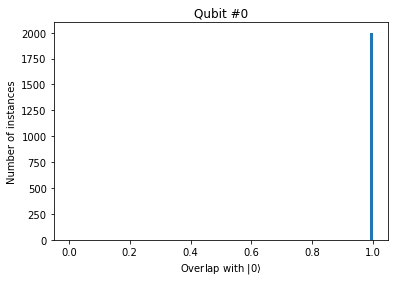

In [9]:
plt.hist(ps_nosame[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.xlabel(r"Overlap with $|0\rangle$")
plt.ylabel("Number of instances")
plt.show()

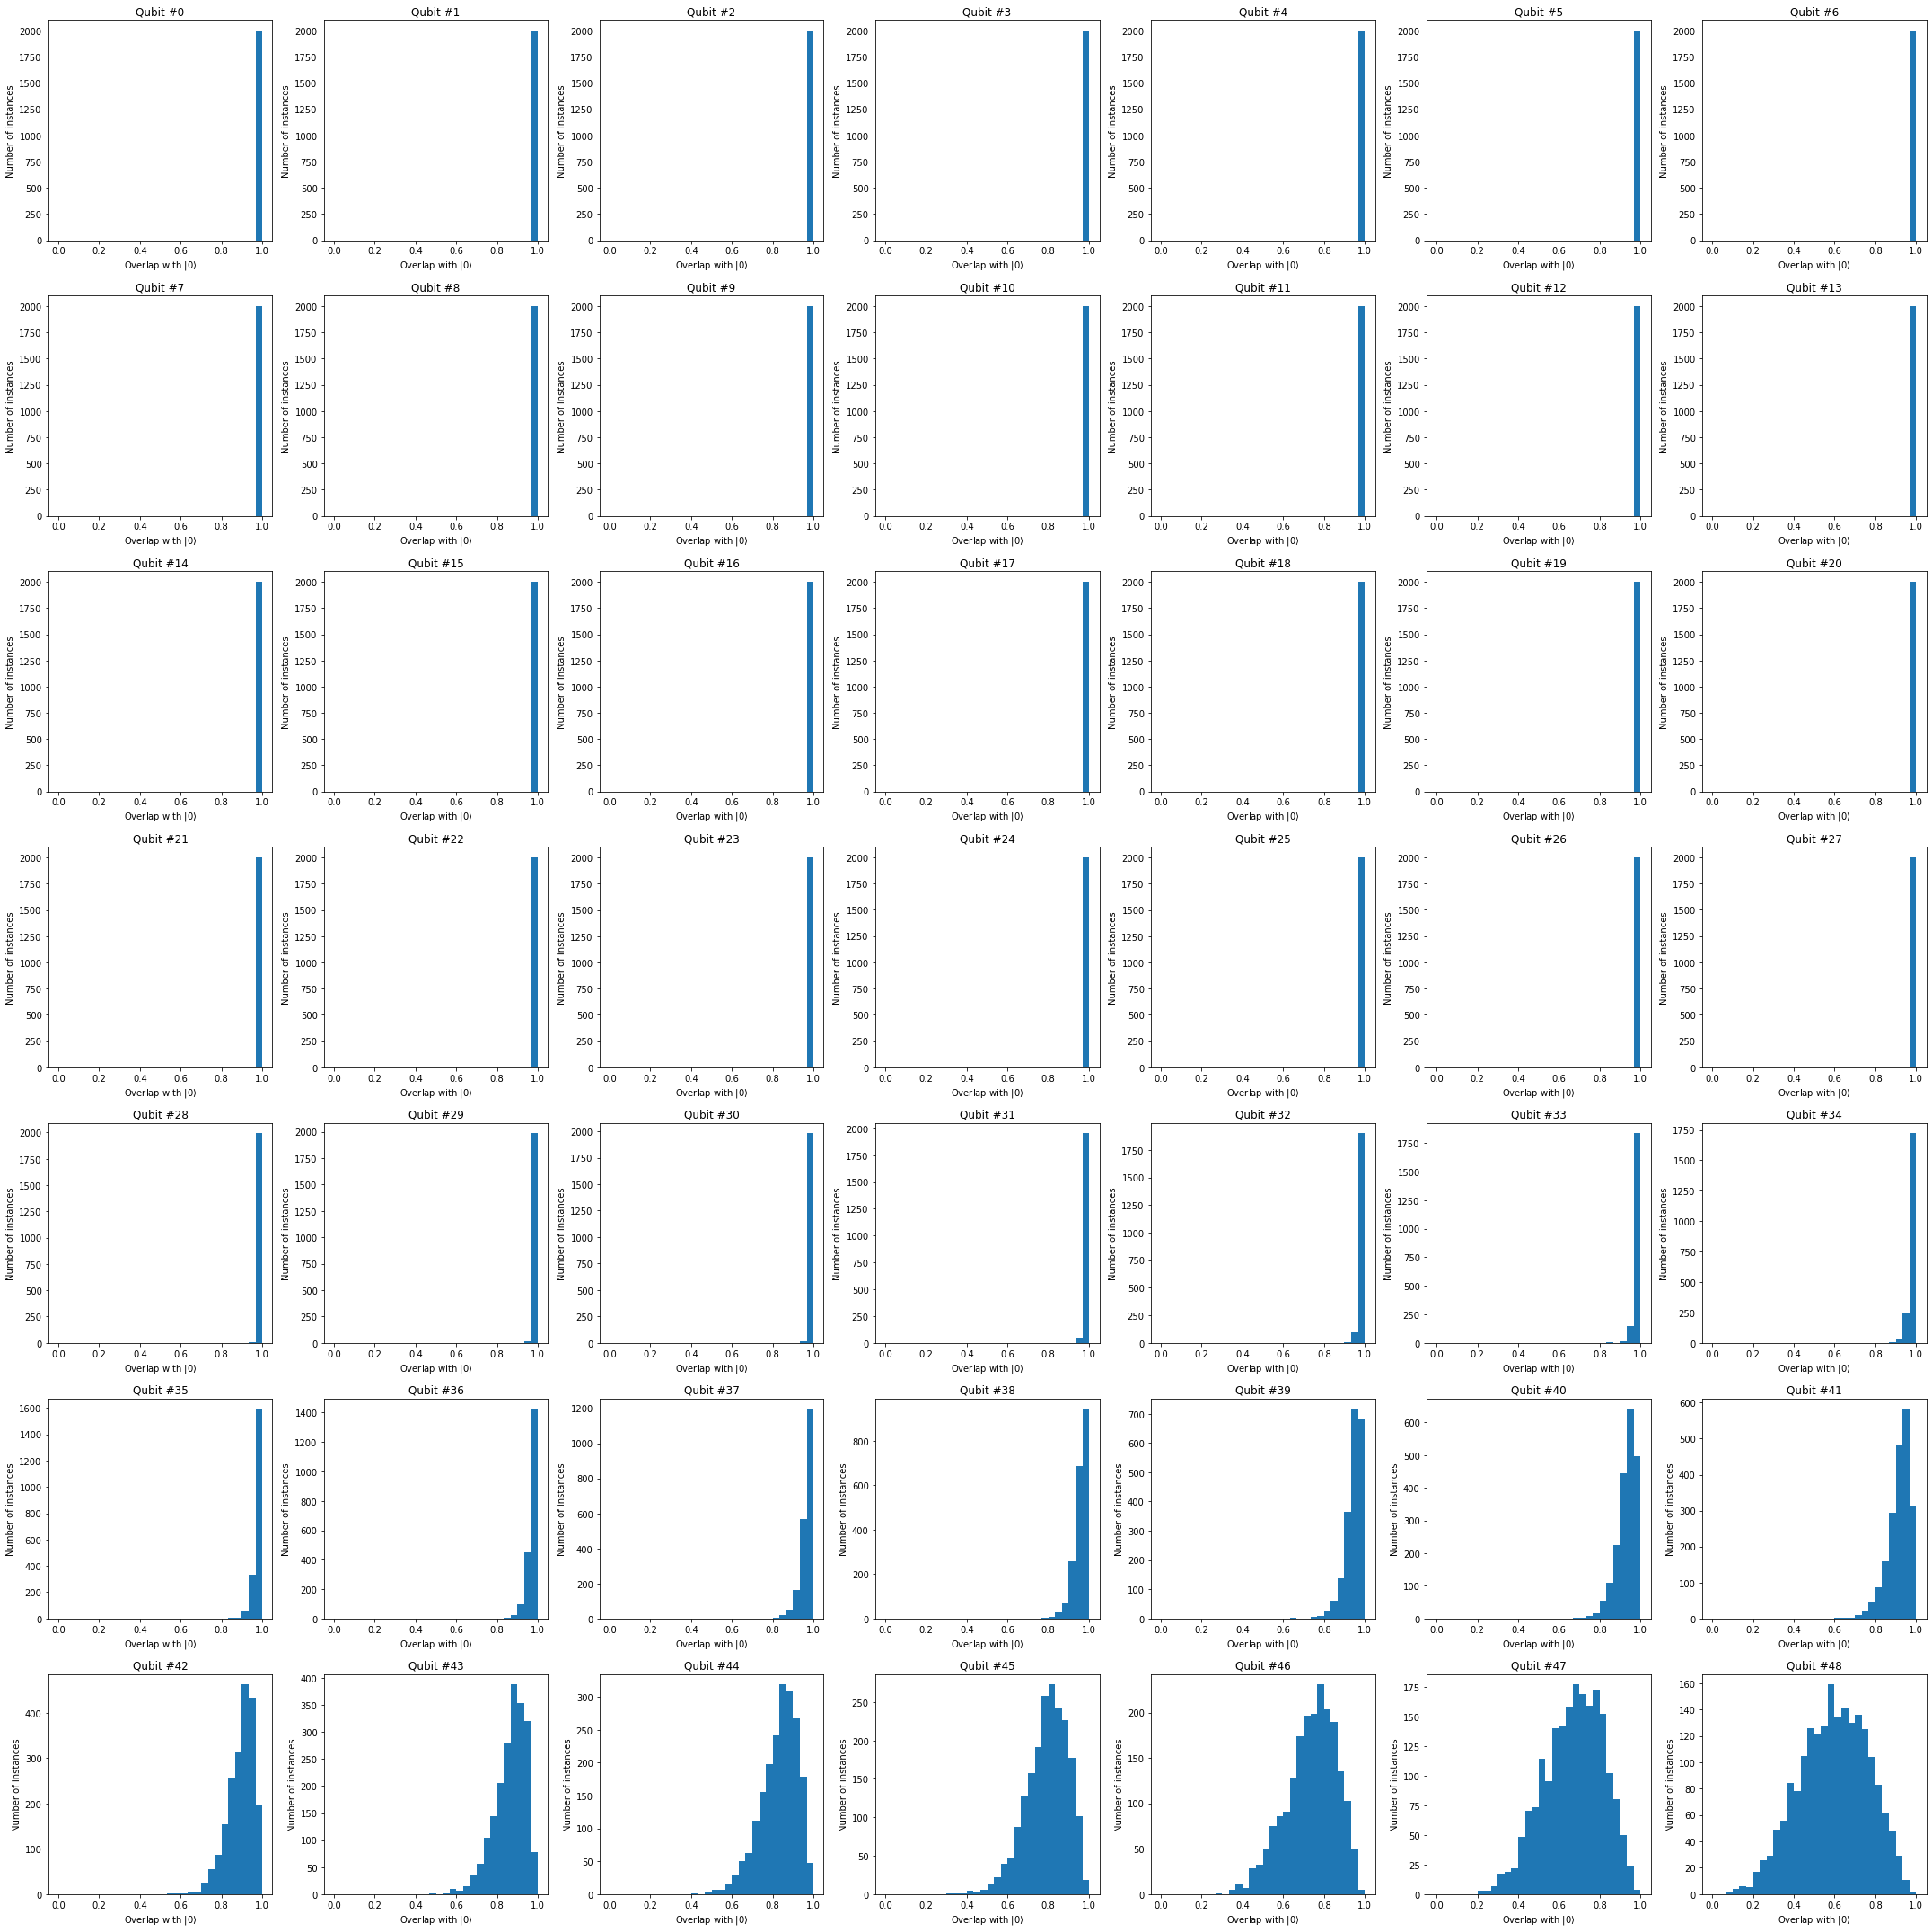

In [10]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(49):
    ax=fig.add_subplot(7,7, i+1)
    ax.hist(ps_nosame[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_xlabel(r"Overlap with $|0\rangle$")
    ax.set_ylabel("Number of instances")

fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


In [12]:
top3 = [cs.sample_top_k(30) for i in tqdm(range(1000))]

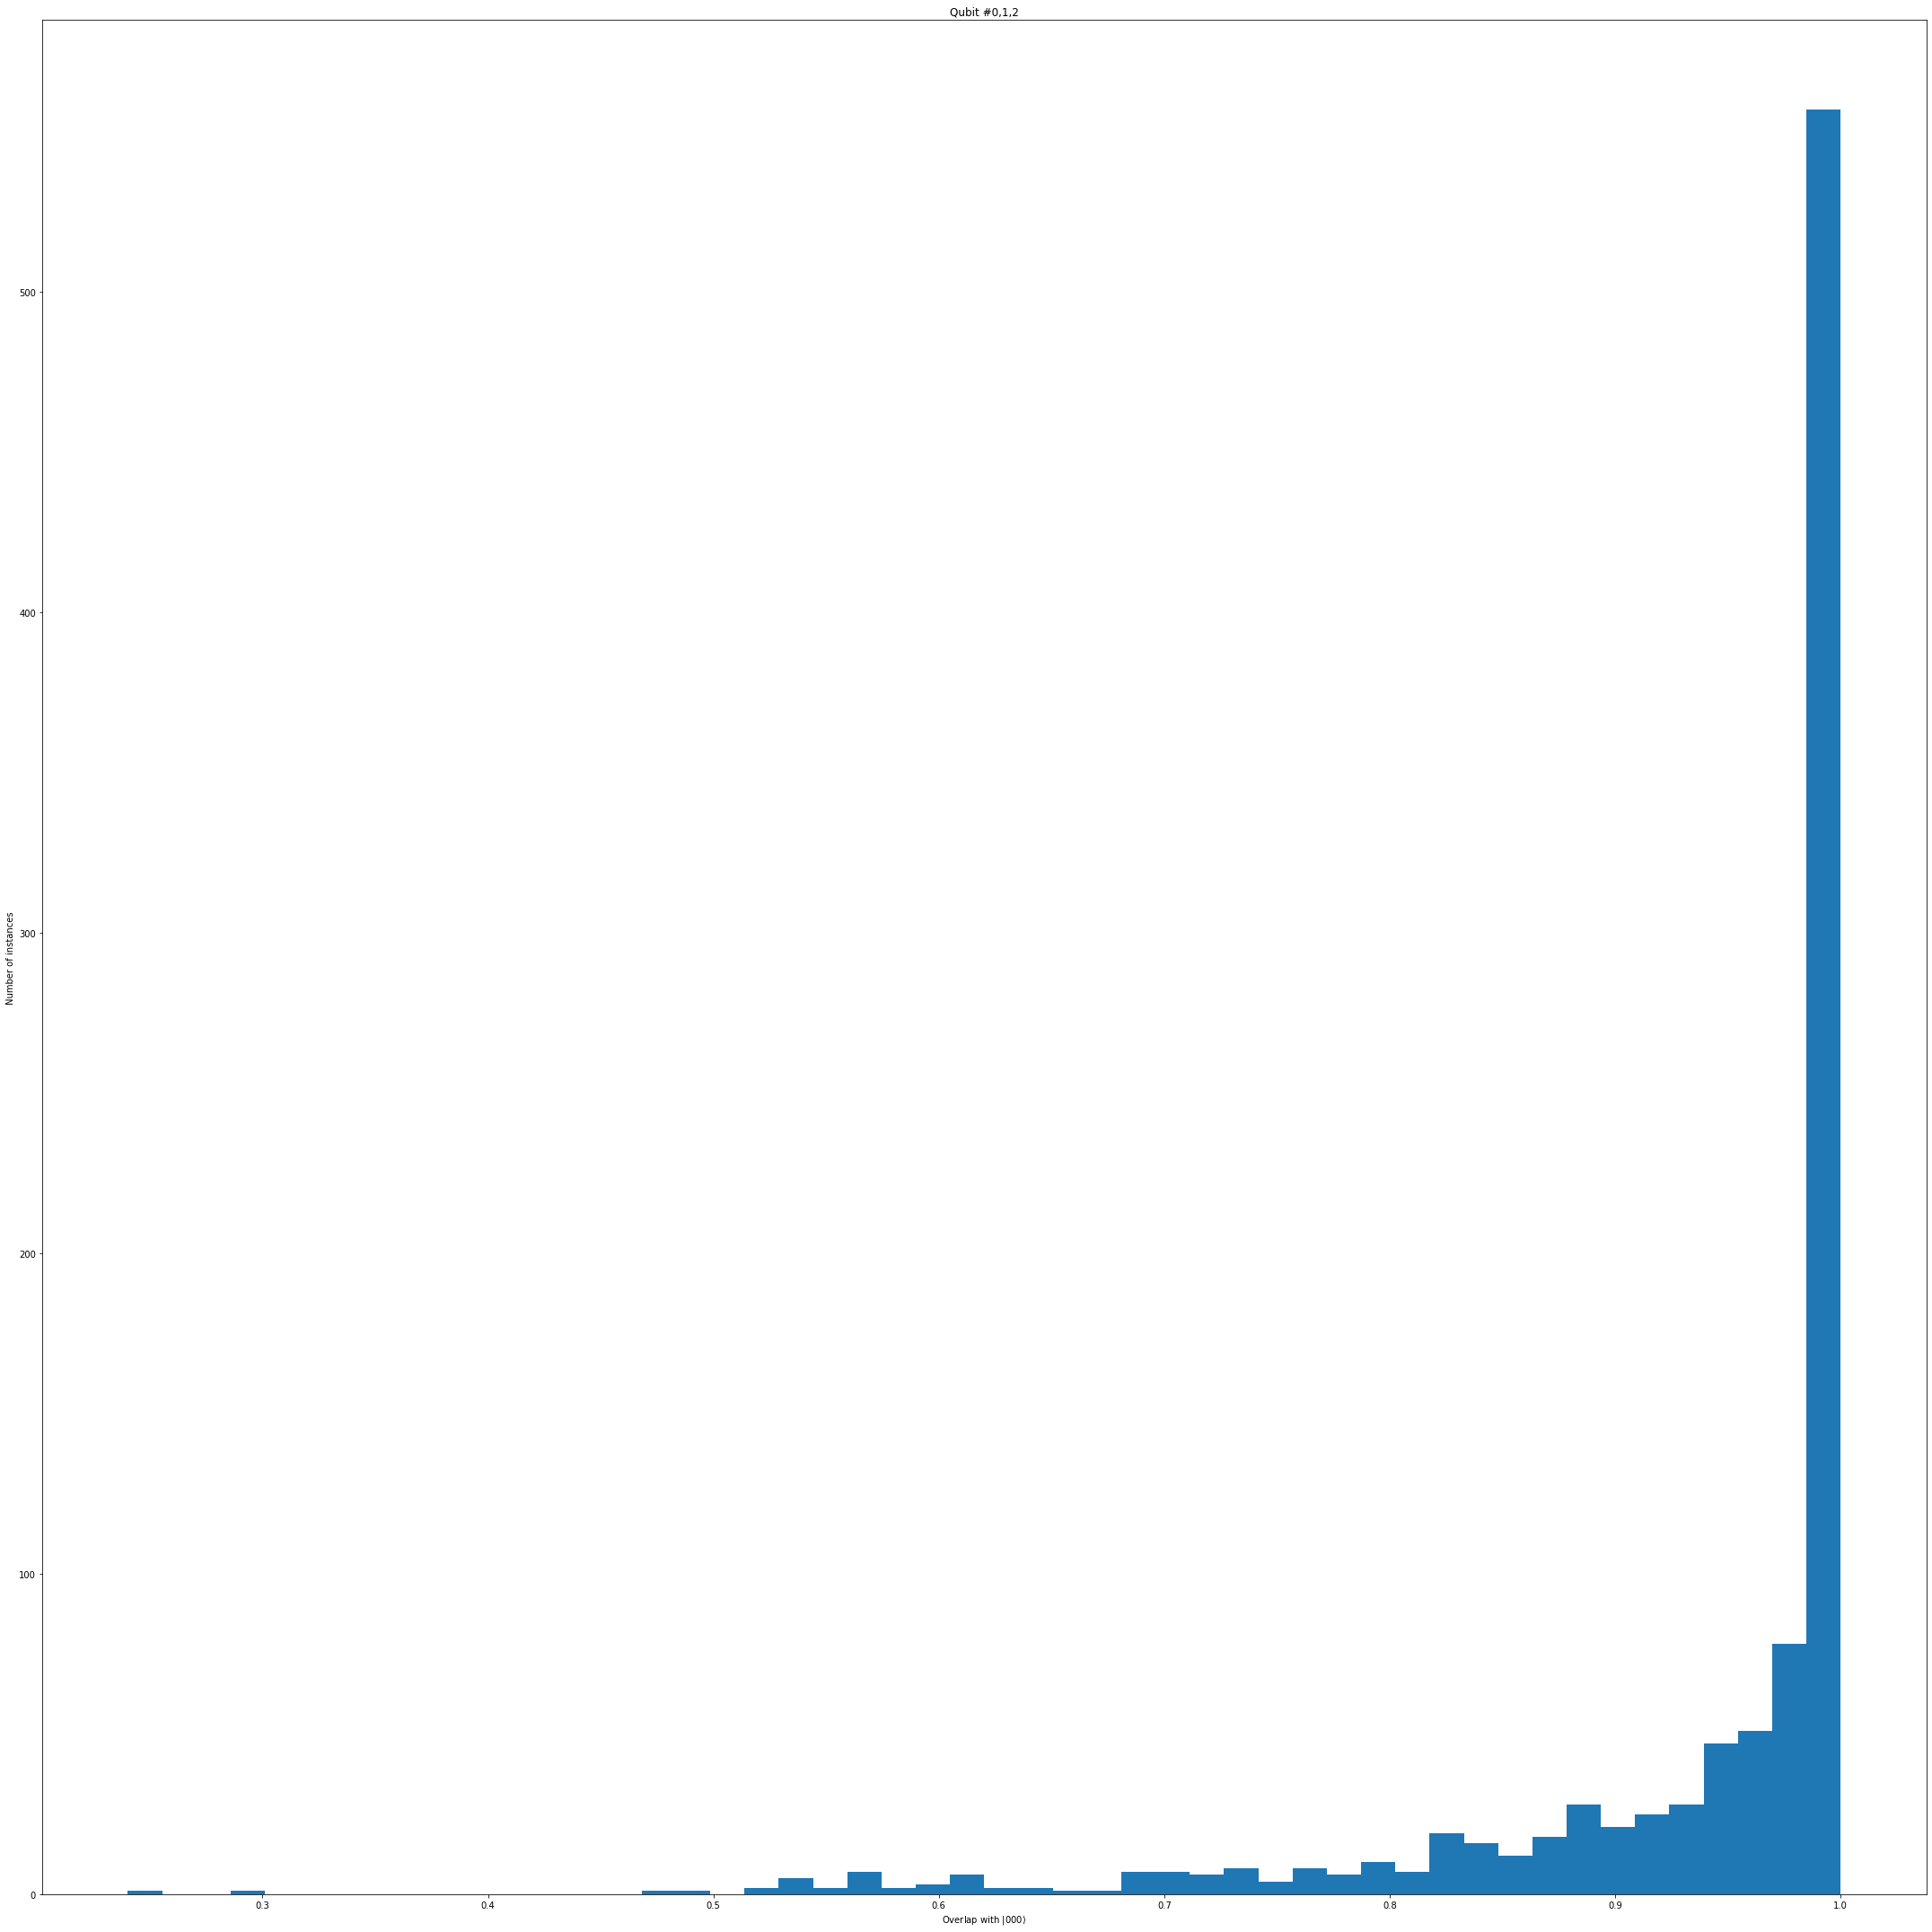

In [13]:
fig=plt.figure(figsize=(30, 30))
t = 0
ax=fig.add_subplot(1,1, 1)
ax.hist(top3, bins = 50)
ax.set_title("Qubit #0,1,2")
ax.set_xlabel(r"Overlap with $|000\rangle$")
ax.set_ylabel("Number of instances")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()
# Note the range

# New ladder

In [14]:
ps = []
for x in tqdm(range(200)):
    ps.append(cs.sample_better_ladder_faster_probabilities(4,1))
ps = np.array(ps)

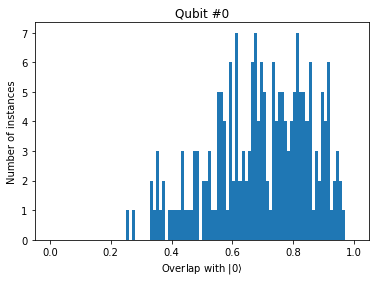

In [15]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.xlabel(r"Overlap with $|0\rangle$")
plt.ylabel("Number of instances")
plt.show()

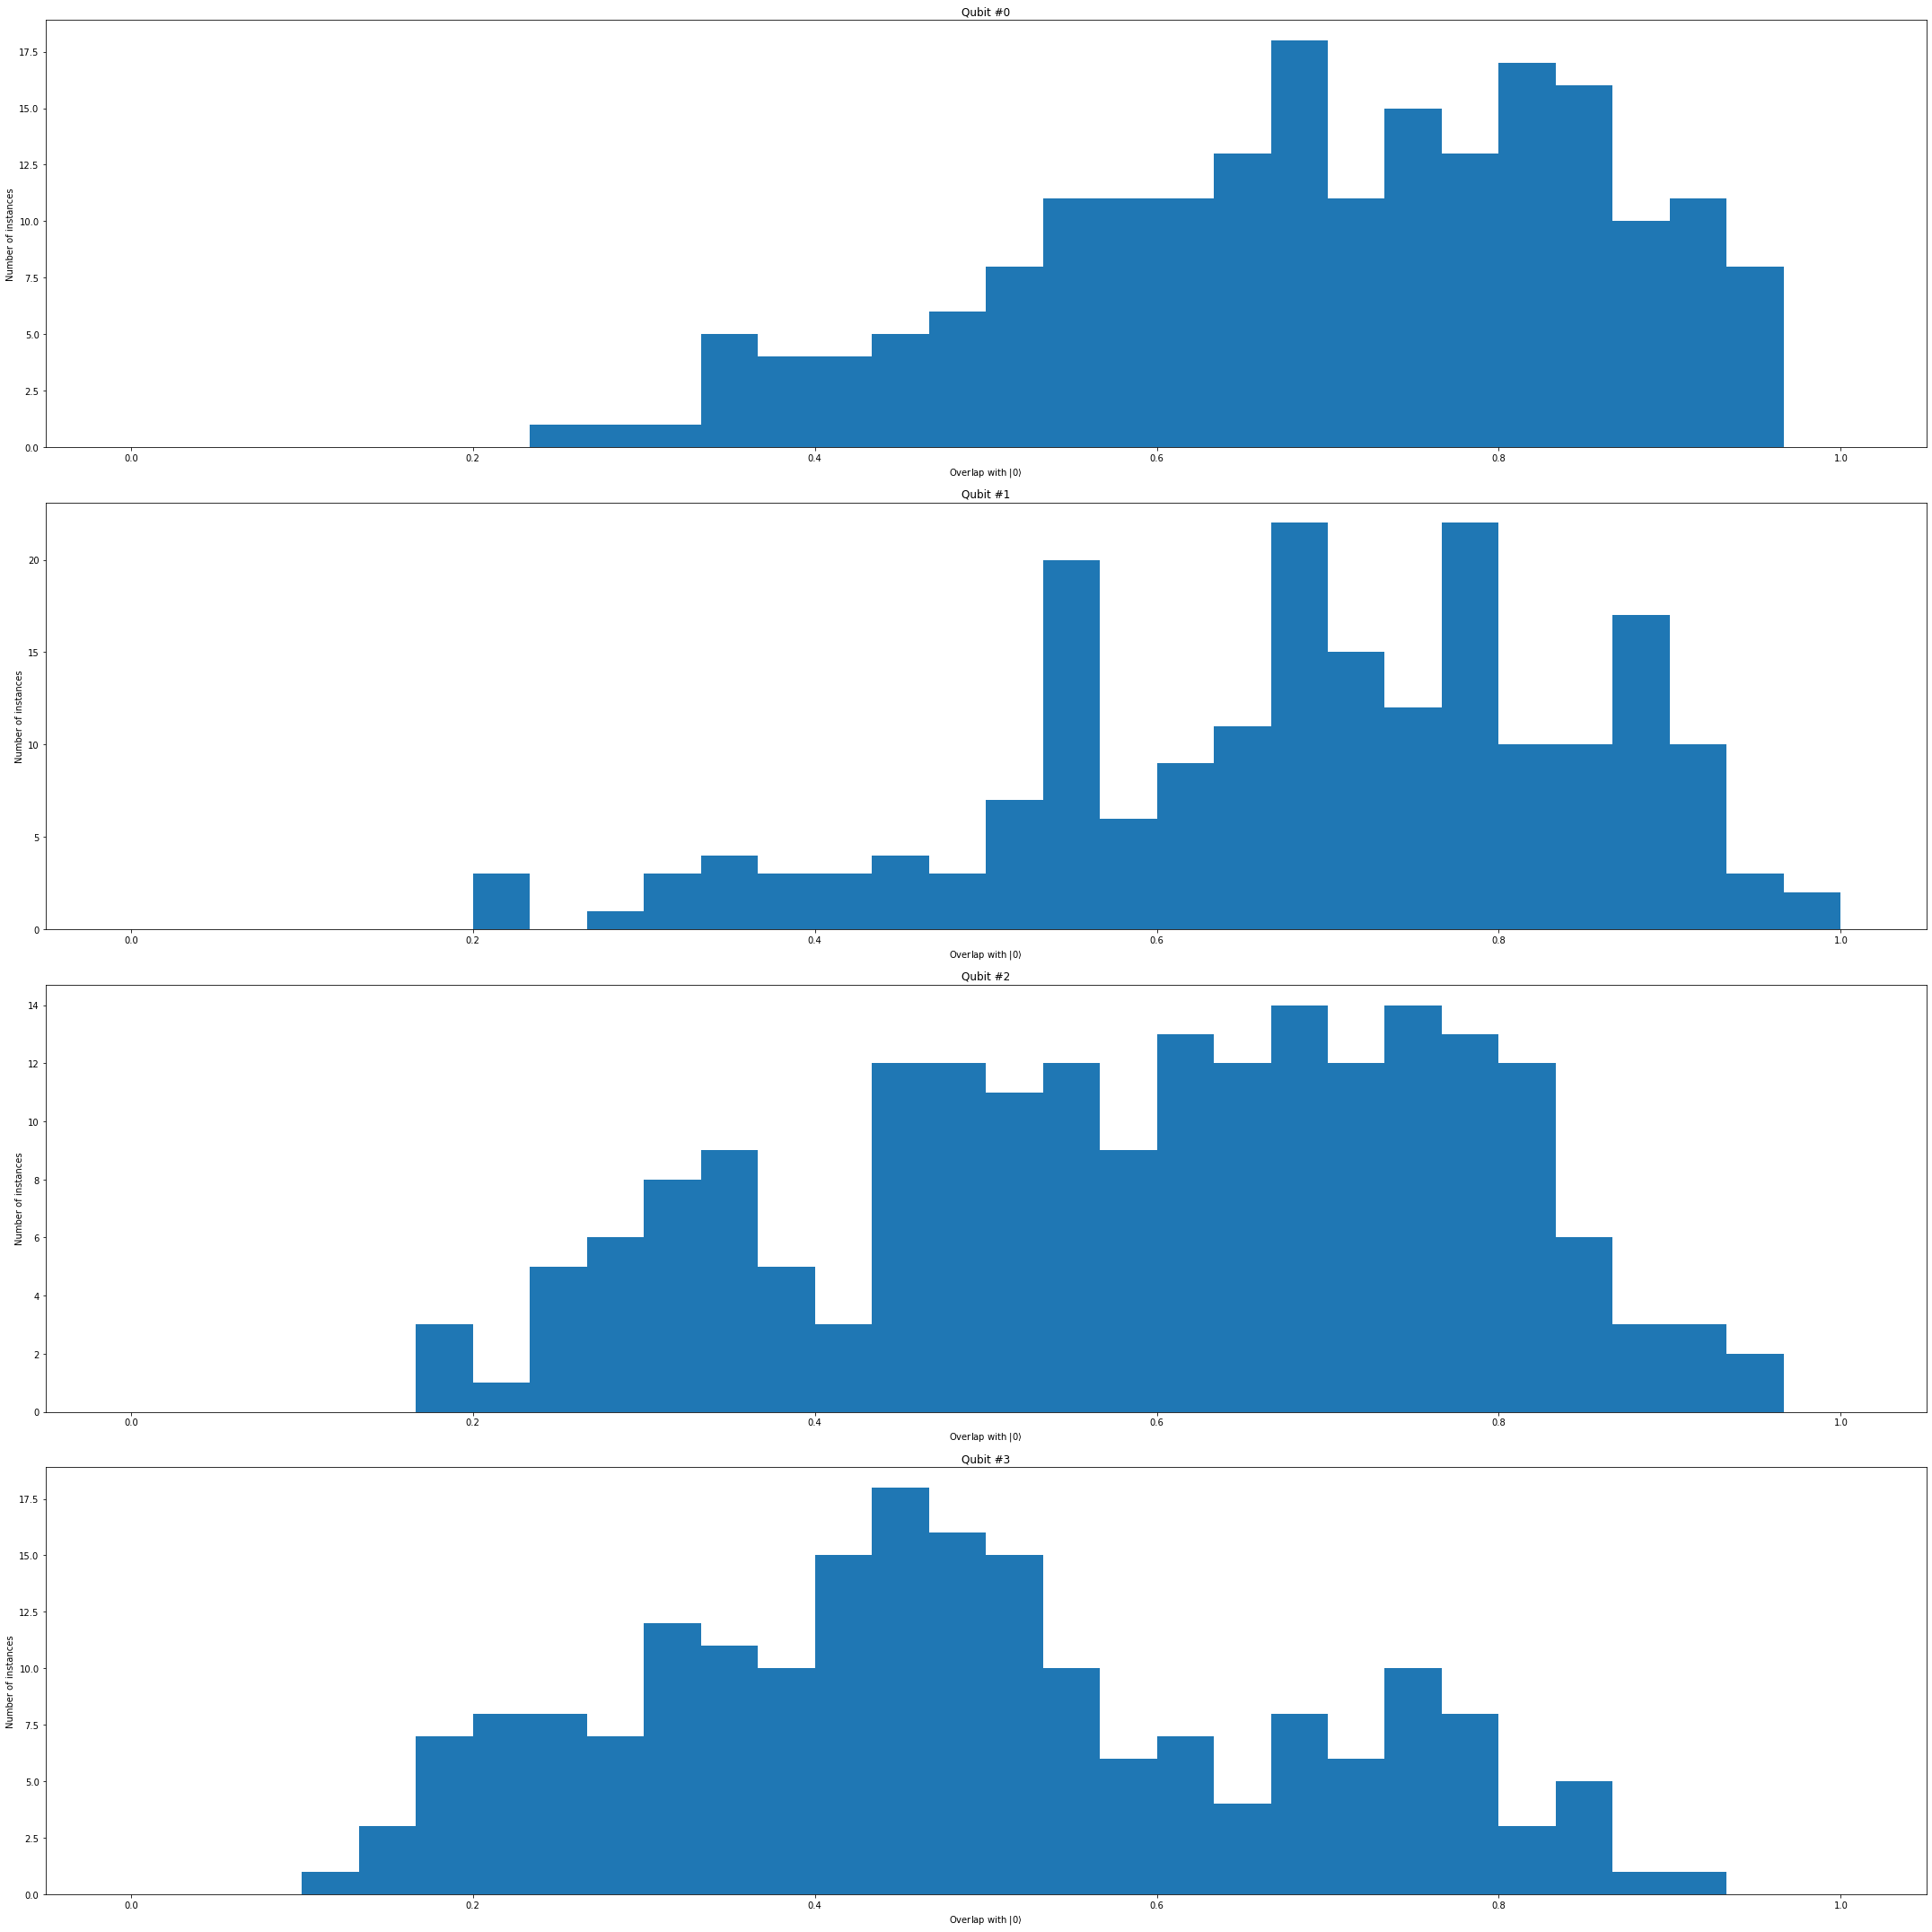

In [16]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(4):
    ax=fig.add_subplot(4,1, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_xlabel(r"Overlap with $|0\rangle$")
    ax.set_ylabel("Number of instances")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


In [17]:
ps = []
for x in tqdm(range(200)):
    ps.append(cs.sample_better_ladder_faster_probabilities(3*3+1,2))
ps = np.array(ps)

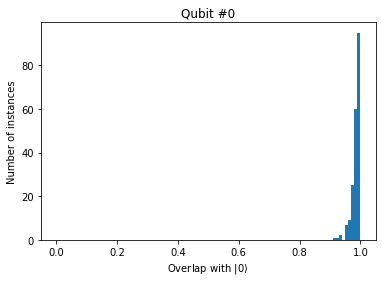

In [18]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.xlabel(r"Overlap with $|0\rangle$")
plt.ylabel("Number of instances")
plt.show()

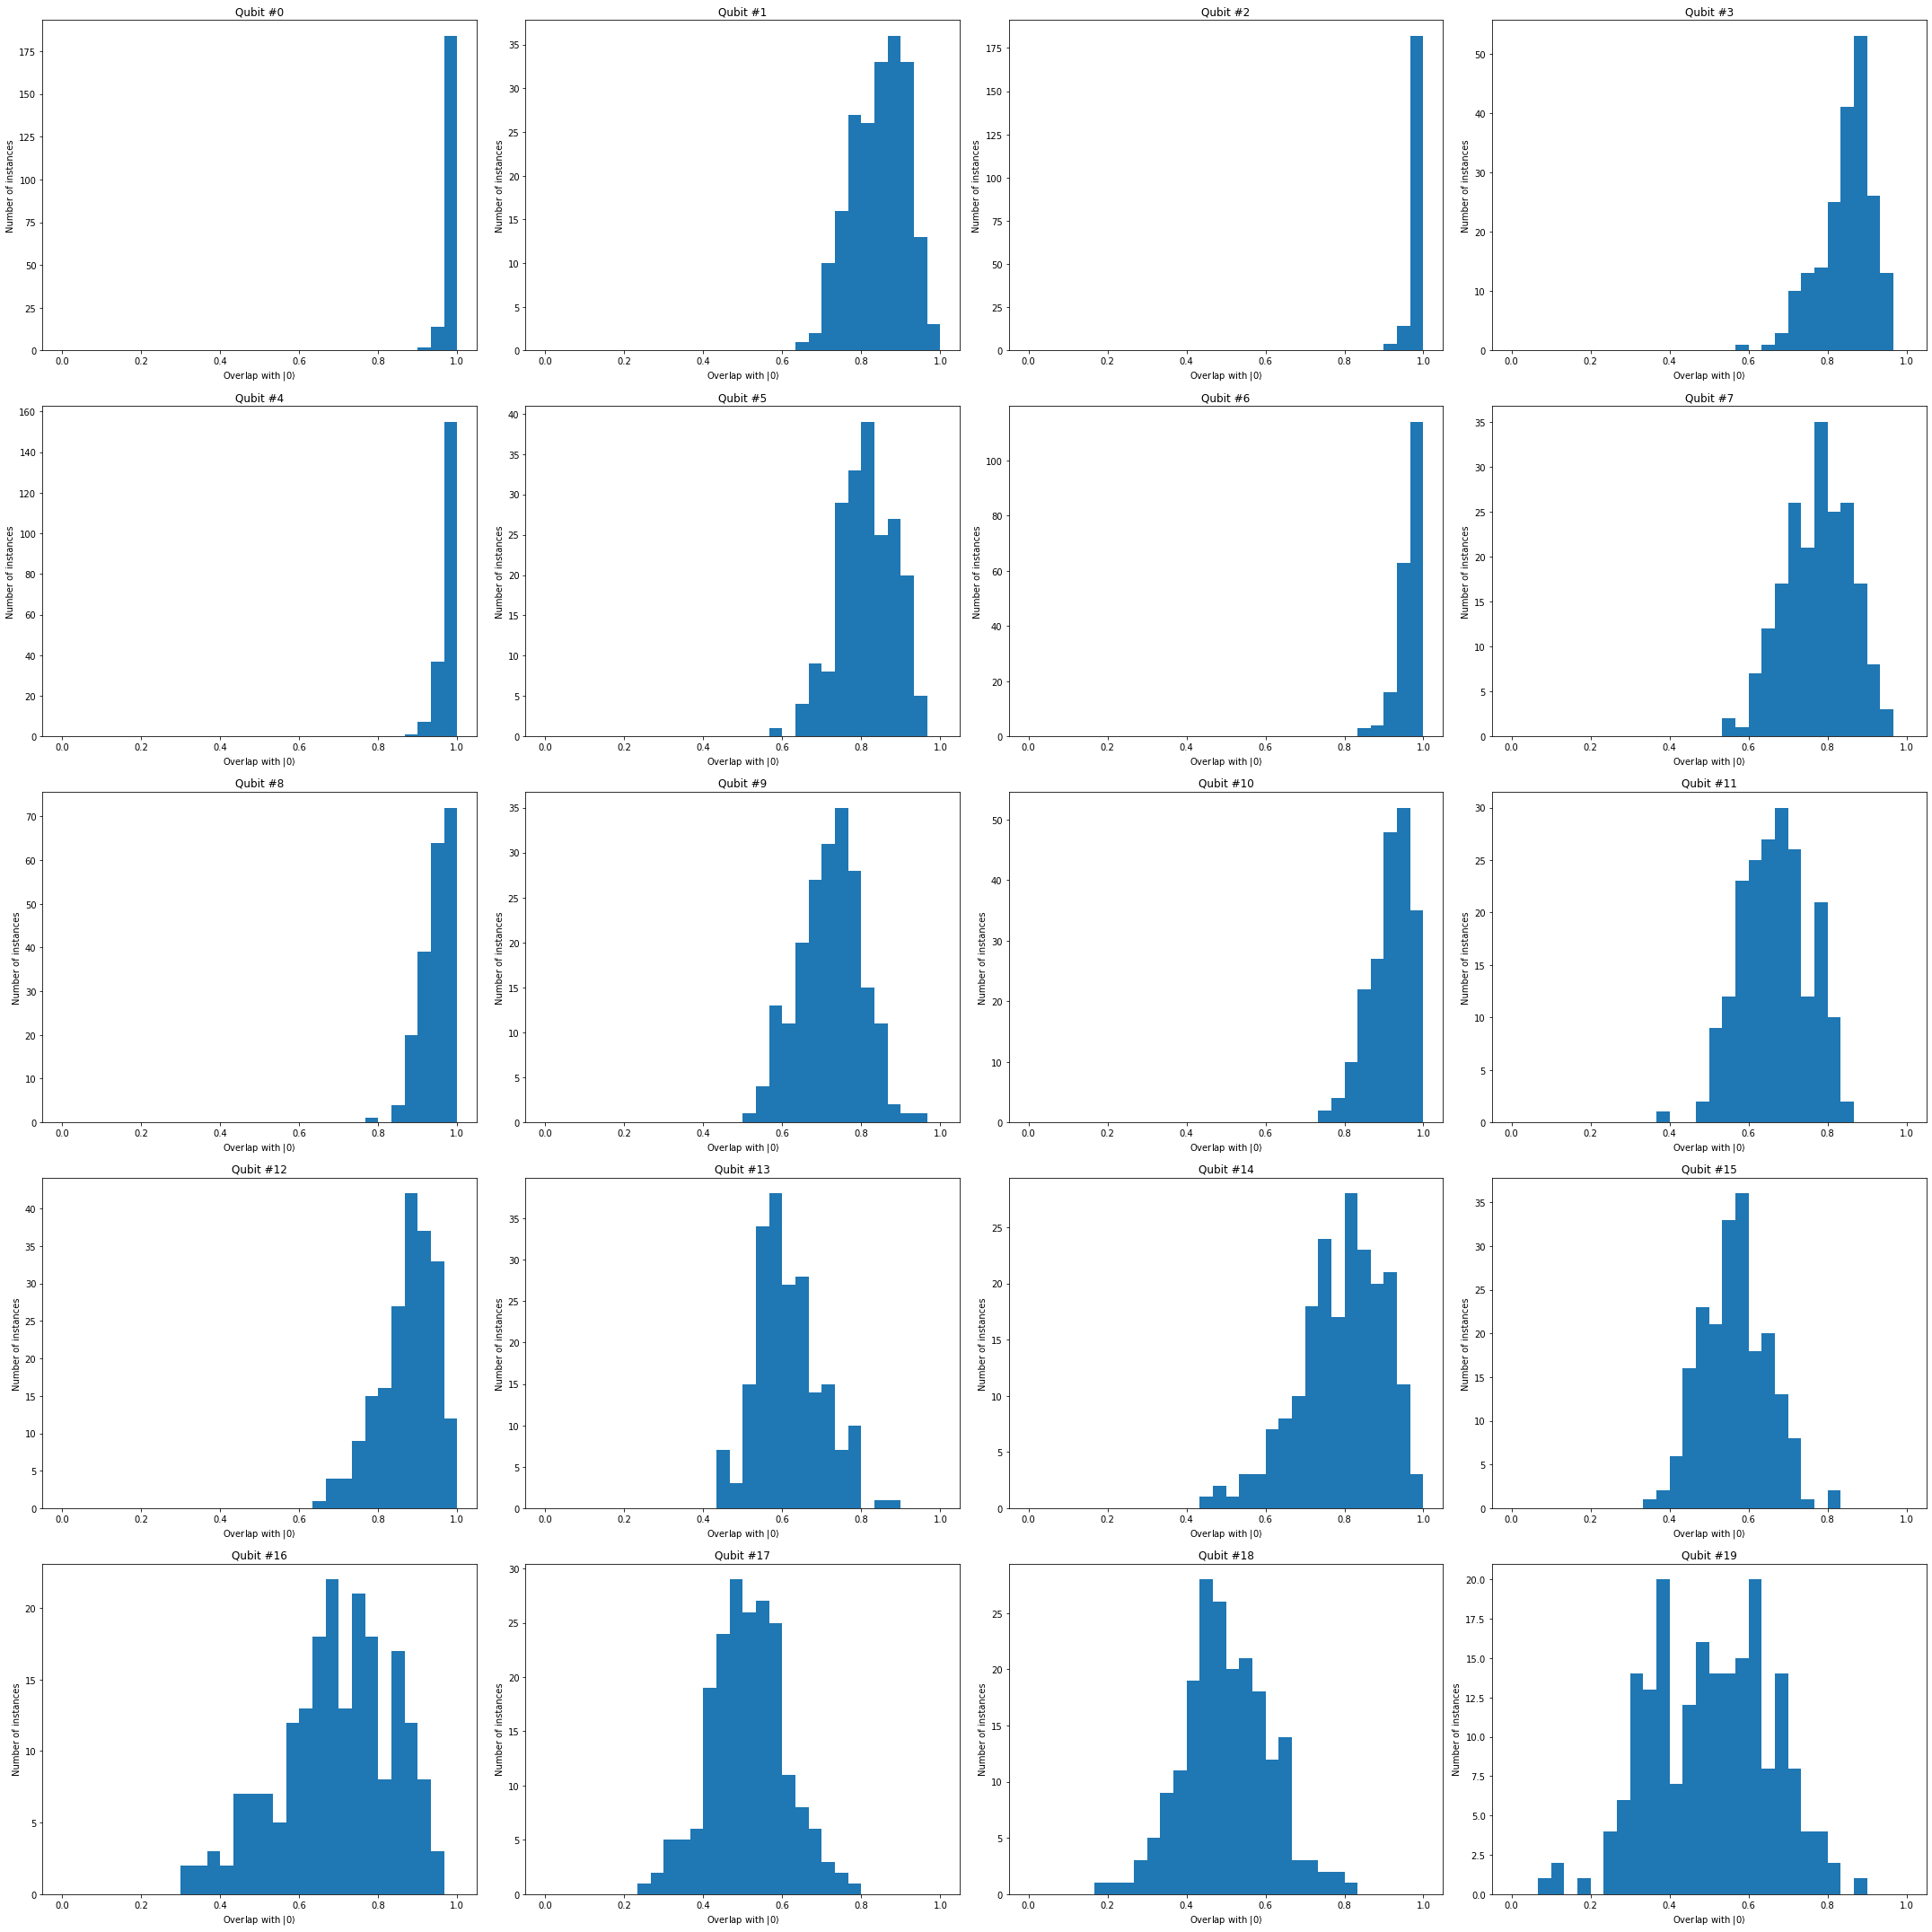

In [19]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(10*2):
    ax=fig.add_subplot(5,4, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_xlabel(r"Overlap with $|0\rangle$")
    ax.set_ylabel("Number of instances")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


In [7]:
ps = []

In [ ]:
for x in tqdm(range(len(ps),200)):
    ps.append(cs.sample_better_ladder_faster_probabilities(5,3))
ps = np.array(ps)

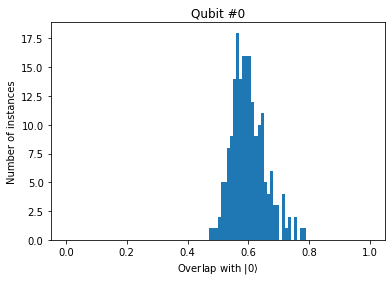

In [12]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.xlabel(r"Overlap with $|0\rangle$")
plt.ylabel("Number of instances")
plt.show()

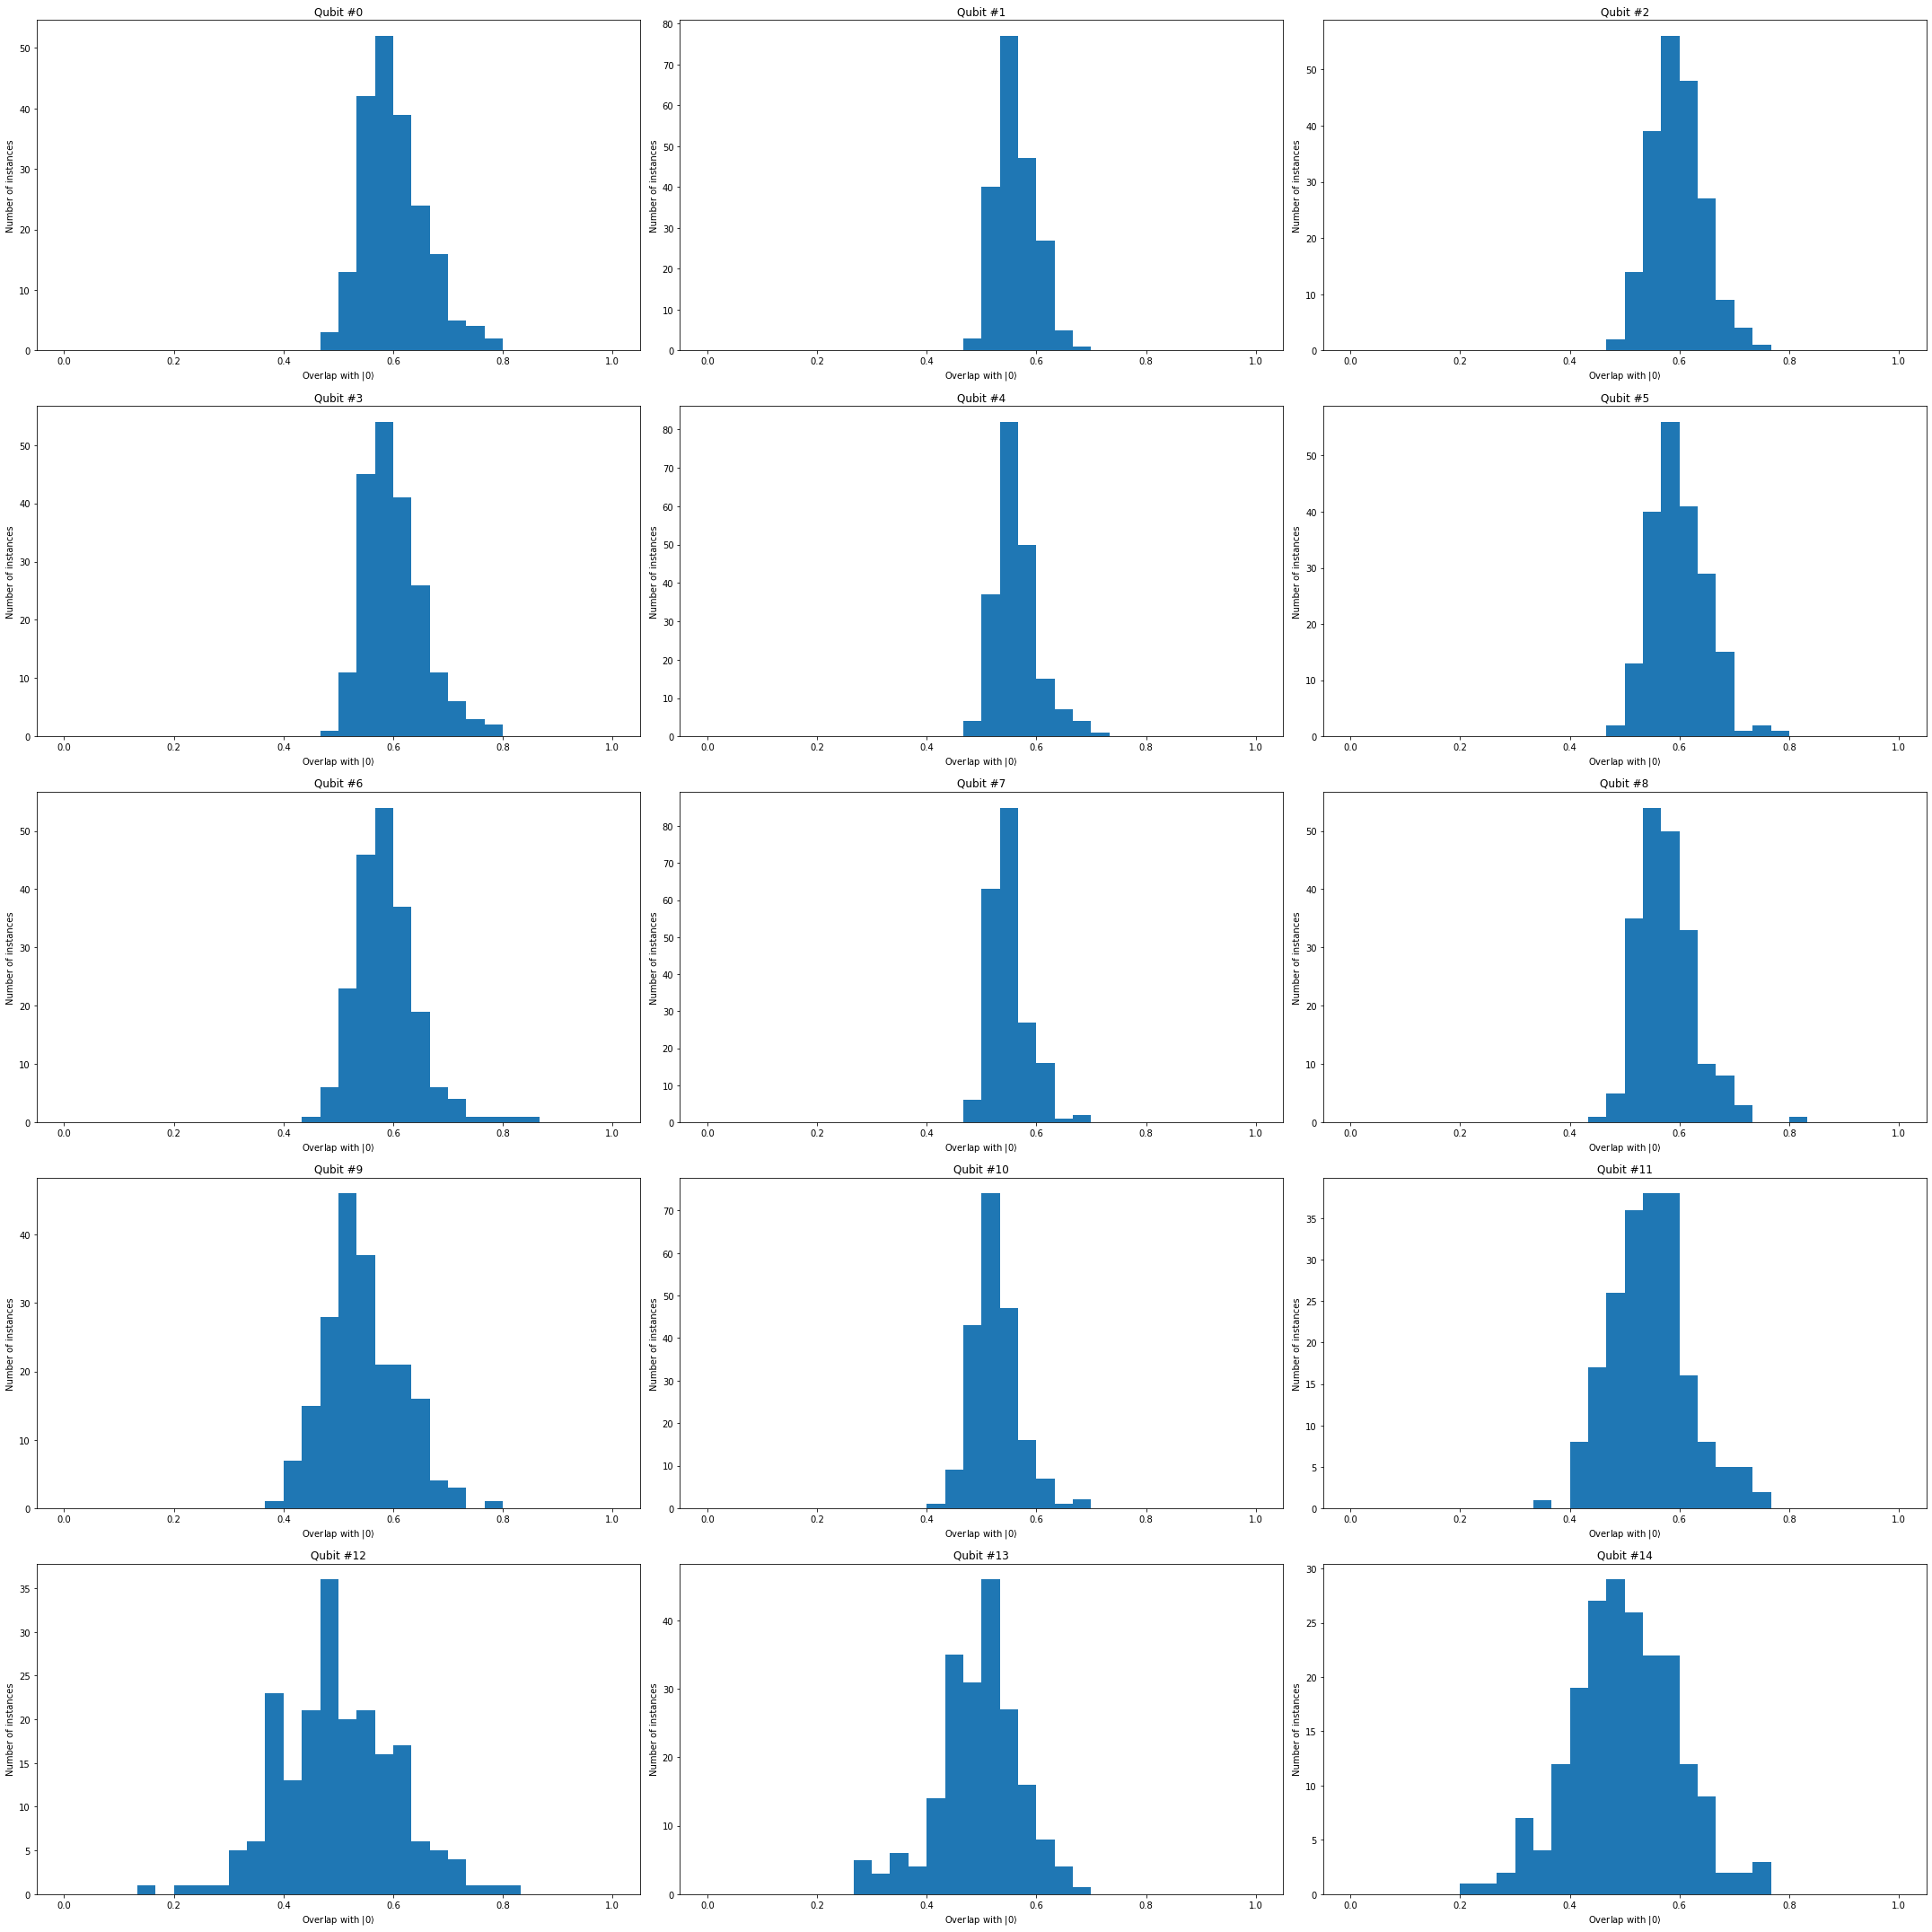

In [13]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(15):
    ax=fig.add_subplot(5,3, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_xlabel(r"Overlap with $|0\rangle$")
    ax.set_ylabel("Number of instances")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


# April 6 update

## Eigenvalues (edit: ignore, wrong)

In [14]:
# not the correct transfer matrix, but it still showcases something we can do
# so leaving the code here for futture reference

In [15]:
lad = cs.sample_ladder(50, all_same=True)
m = cs.compute_mps(50, lad)

m1 = m.copy(conjugate=False)
m2 = m.copy(conjugate=True)

all_nodes = []
for i in range(m.n_qubits):
    m1.out_edge(i) ^ m2.out_edge(i)

for i in range(m.n_qubits):
    all_nodes.append(m1.nodes[i] @ m2.nodes[i])

for n in all_nodes:
    s = n.tensor.shape
    tf = n.tensor.reshape((s[0]*s[1], s[2]*s[3]))
    eigs = sorted(np.real(np.linalg.eigvalsh(tf)))[::-1]
    print(np.log(np.abs(eigs[0] / eigs[1])))

0.9356005513856016
0.9881594251208313
0.9143585024666628
0.90302286638587
0.9245564610494357
0.9344601568424034
0.931101004838407
0.9302461675598667
0.9306878007945681
0.9307346531183934
0.9306763126430382
0.9306755347313608
0.9306821204131722
0.930681525592954
0.9306808023281836
0.930680934233378
0.930681004082556
0.9306809818858673
0.9306809757965454
0.9306809789078834
0.9306809793117043
0.9306809789120901
0.9306809789068156
0.9306809789670993
0.9306809789732536
0.9306809789887732
0.930680979194712
0.9306809797526926
0.9306809802215216
0.9306809811679035
0.9306809919826149
0.930681022251057
0.9306810296519467
0.9306810737441346
0.9306818460558671
0.9306831122880953
0.9306819187138472
0.9306892153607429
0.9307370912536005
0.9307475163684232
0.9307062736866087
0.9314996949238998
0.9331804764280182
0.9319782164265106
0.9365139291524242
0.9846969945344763
0.9564527378395284
0.9966670131397422
0.6449544513017287
0.38717060952785565


In [16]:
# eigenvalues for the diagram showed
eigs = []
for _ in range(10000):
    g = cs.random_unitary_gate(2)
    g = cs.normalize_gate(g)

    t = np.tensordot(np.array([1,0]), g, axes=[0,0])
    o = np.tensordot(t, np.conj(t), axes=[1,1])
    o = np.transpose(o, (1, 2, 3, 0)).reshape(4,4)

    u = sorted(np.linalg.eigvalsh(o))
    eigs.append(u[1])

[]

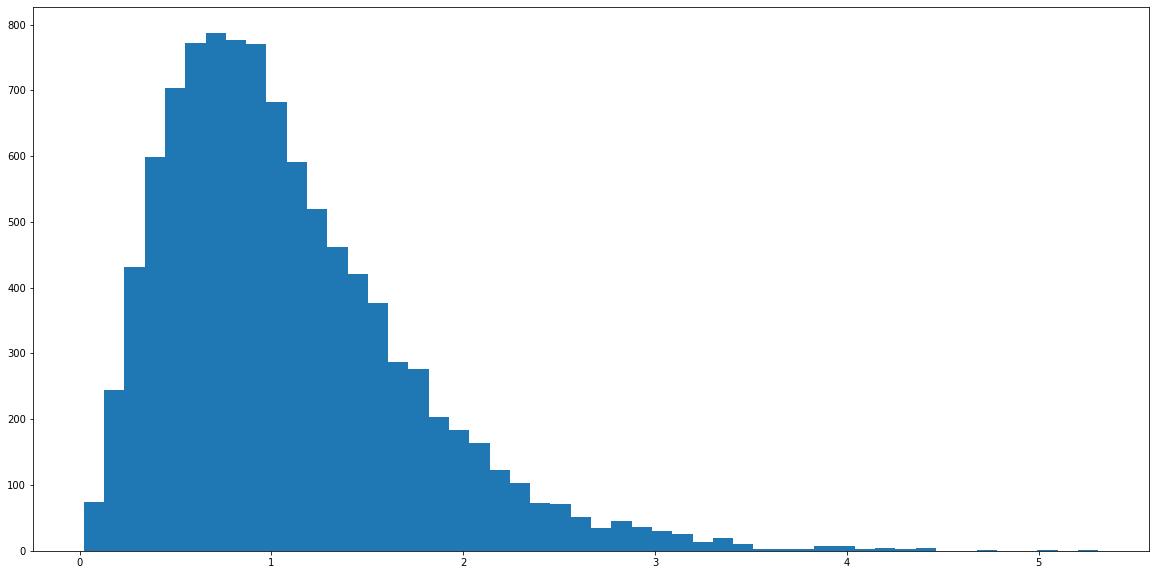

In [17]:
fig=plt.figure(figsize=(20, 10))
plt.hist(-np.log(eigs), bins = 50)
plt.plot()

In [18]:
um = cs.random_unitary_gate(2)

# u = tn.Node(np.zeros((2,3,4,5)), axis_names = ['a','b','c','d'])

In [19]:
def get_op_from_matrix(um):
    if len(um.shape) == 4:
        u = tn.Node(um, axis_names = ['a','b','c','d'])
    else:
        u = tn.Node(cs.normalize_gate(um), axis_names = ['a','b','c','d'])
    uc = tn.conj(u,axis_names = ['ac','bc','cc','dc'])

    u['c'] ^ uc['cc']
    # u[3] ^ uc[3]

    m = tn.Node(np.array([1,0]))
    m[0] ^ u['a']

    mc = tn.Node(np.array([1,0]))
    mc[0] ^ uc['ac']


    n = m @ u


    nc = mc @ uc

    t = n @ nc 
    return t

# Quick benchmark

In [20]:
# Similar code to above, but with the new definitions for sampling

In [21]:
ps = []
for x in tqdm(range(2000)):
    ps.append(cs.sample_all_qubits_faster(50))
ps = np.array(ps)

In [22]:
# when things are not the same
ps_nosame = []
for x in tqdm(range(2000)):
    ps_nosame.append(cs.sample_all_qubits_faster(50, all_same=False))
ps_nosame = np.array(ps_nosame)

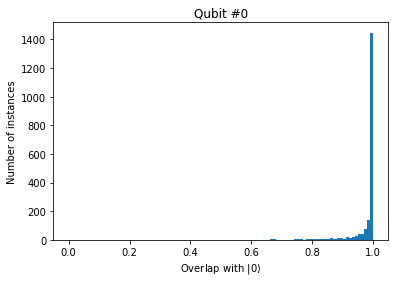

In [23]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.xlabel(r"Overlap with $|0\rangle$")
plt.ylabel("Number of instances")
plt.show()

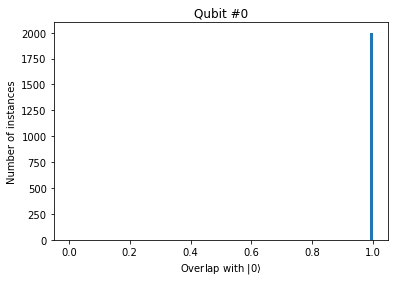

In [24]:
plt.hist(ps_nosame[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.xlabel(r"Overlap with $|0\rangle$")
plt.ylabel("Number of instances")
plt.show()

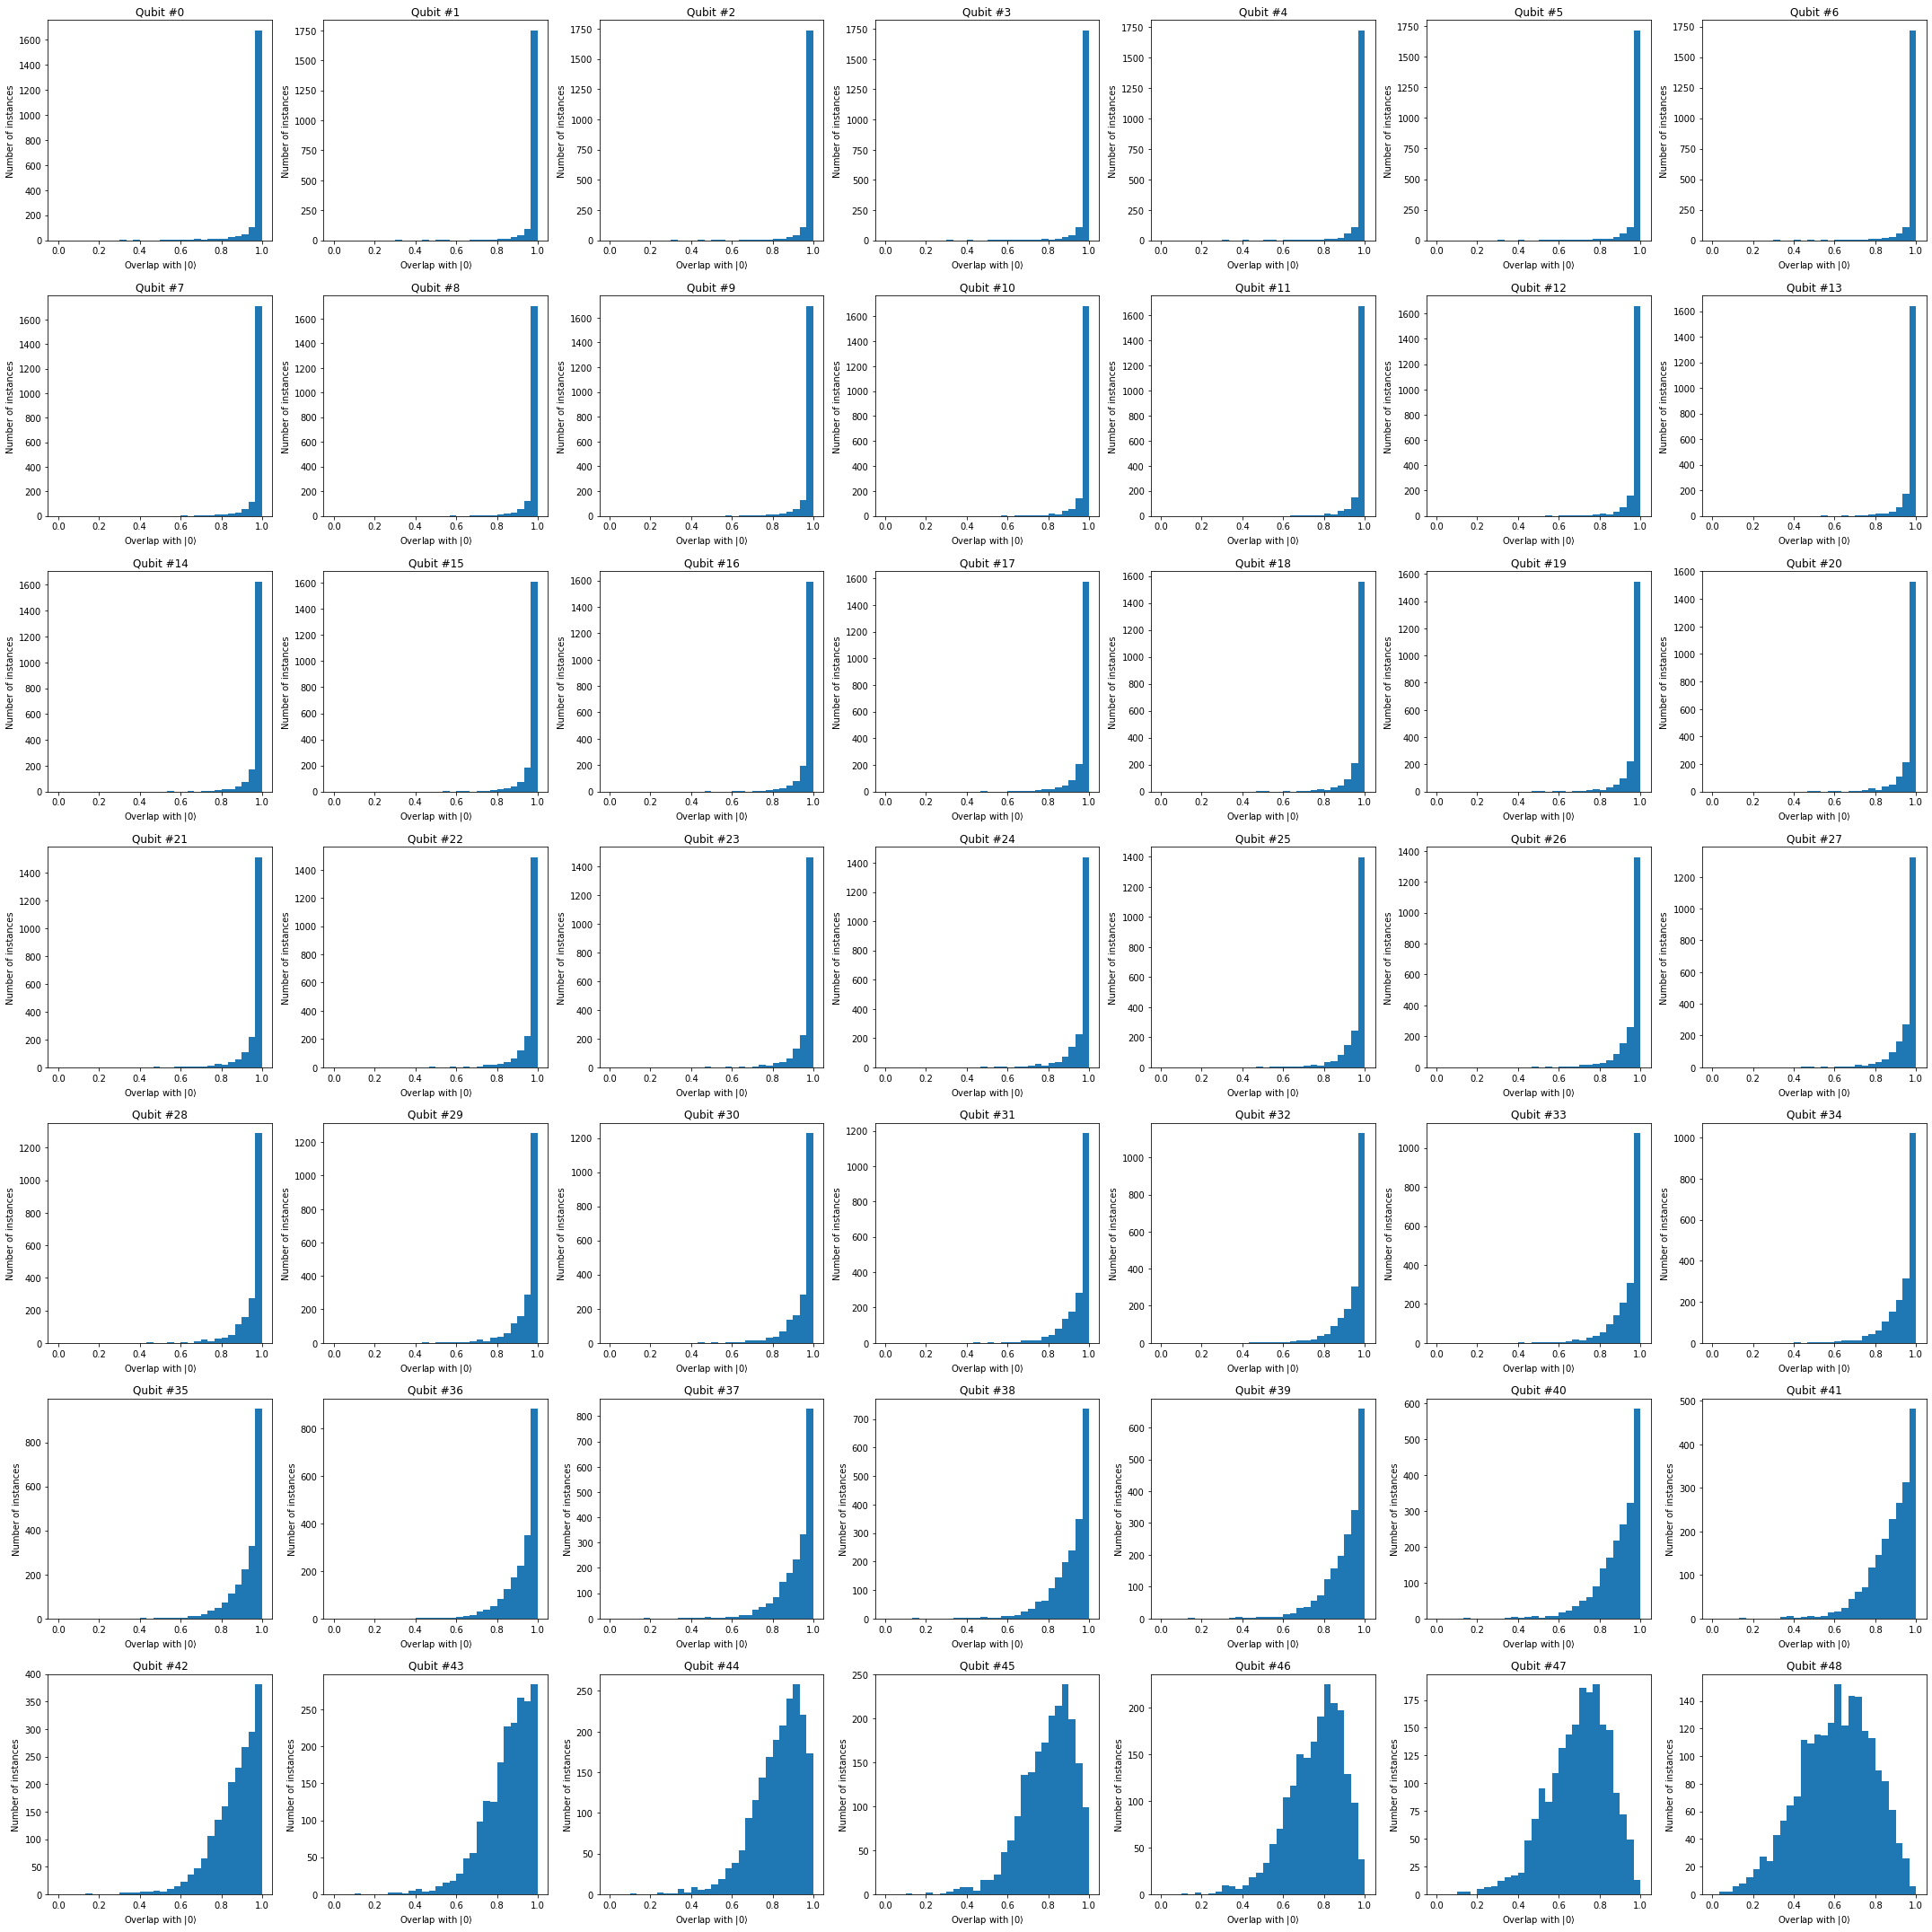

In [25]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(49):
    ax=fig.add_subplot(7,7, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_xlabel(r"Overlap with $|0\rangle$")
    ax.set_ylabel("Number of instances")
    
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


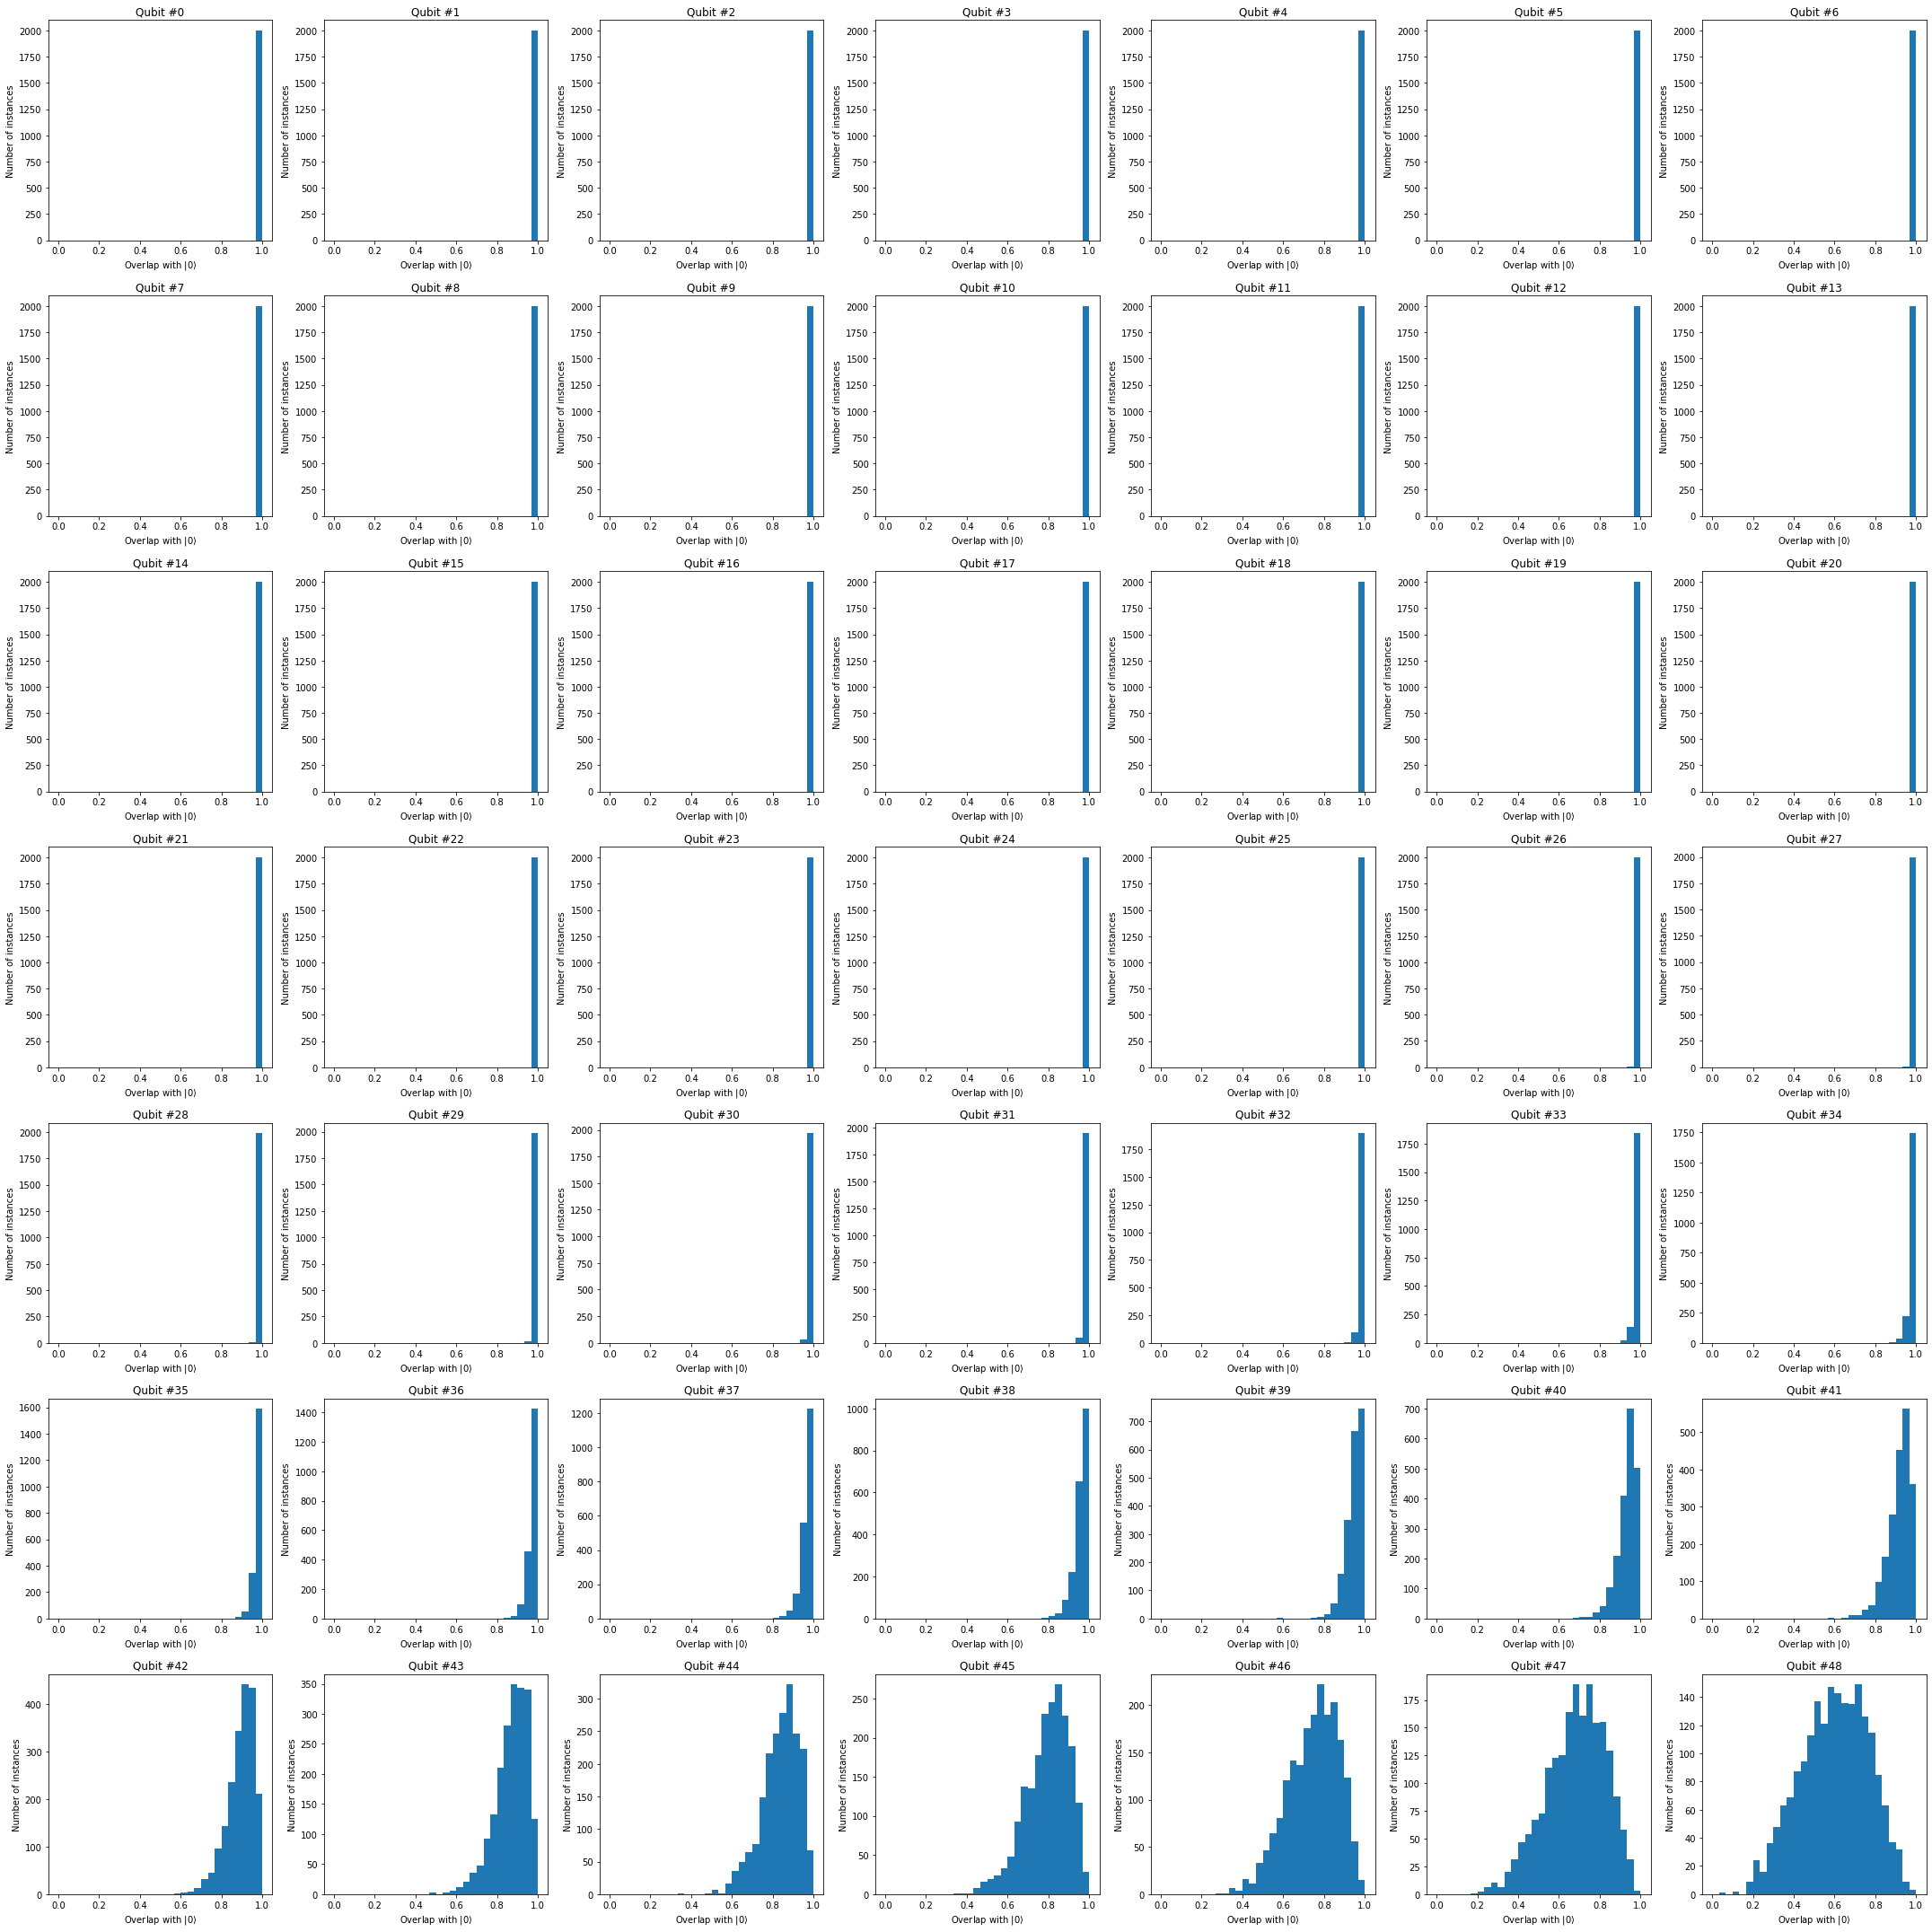

In [26]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(49):
    ax=fig.add_subplot(7,7, i+1)
    ax.hist(ps_nosame[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_xlabel(r"Overlap with $|0\rangle$")
    ax.set_ylabel("Number of instances")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


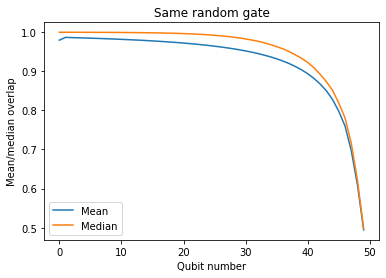

In [27]:
#blue is mean, orange is median
plt.plot(np.mean(ps,axis=0), label='Mean')
plt.plot(np.median(ps,axis=0), label='Median')
plt.legend()
plt.xlabel("Qubit number")
plt.ylabel("Mean/median overlap")
plt.title("Same random gate")
plt.show()

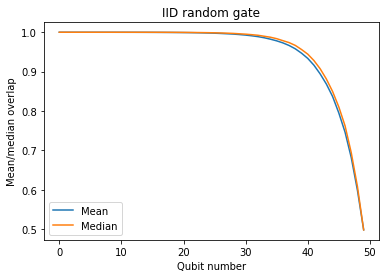

In [28]:
plt.plot(np.mean(ps_nosame,axis=0), label='Mean')
plt.plot(np.median(ps_nosame,axis=0), label='Median')
plt.legend()
plt.xlabel("Qubit number")
plt.ylabel("Mean/median overlap")
plt.title("IID random gate")
plt.show()

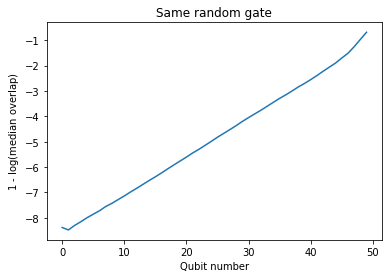

In [29]:
plt.plot(np.log(1-np.median(ps, axis=0)))
plt.xlabel("Qubit number")
plt.ylabel("1 - $\log$(median overlap)")
plt.title("Same random gate")
plt.show()

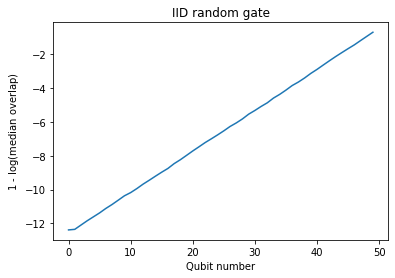

In [30]:
plt.plot(np.log(1-np.median(ps_nosame, axis=0)))
plt.xlabel("Qubit number")
plt.ylabel("1 - $\log$(median overlap)")
plt.title("IID random gate")
plt.show()

In [31]:
# Fitting the exponential
from sklearn.linear_model import LinearRegression 

In [32]:
lr = LinearRegression()
lr.fit(np.array([np.arange(50)]).T, np.log(1-np.median(ps, axis=0)))
lr.coef_[0], lr.intercept_

(0.15469367022531463, -8.667121660898093)

In [33]:
#R2
lr.score(np.array([np.arange(50)]).T, np.log(1-np.median(ps, axis=0)))

0.9983639761664144

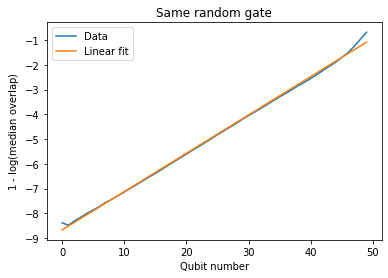

In [34]:
plt.plot(np.log(1-np.median(ps, axis=0)), label='Data')
plt.plot(np.arange(50)*lr.coef_[0] + lr.intercept_, label='Linear fit')
plt.legend()
plt.xlabel("Qubit number")
plt.ylabel("1 - $\log$(median overlap)")
plt.title("Same random gate")
plt.show()

(Recall that the 0-qubit is the closest one, so we have to reverse to measure distance).
So we have that if $o_k$ is the median overlap of the $k$-th qubit, then $-8.72304926423791 + (50-k)\cdot 0.15526394603650606 \approx \log(1-o_k)$. 
That is, 

$$1-o_k \approx e^{-0.959851962 - k\cdot 0.15526394603650606}$$

$$o_k \approx 1- e^{-0.959851962 - k\cdot 0.15526394603650606}$$

$$o_k \approx 1- 0.382949573 \cdot (1.1679662)^{-k}$$


In [35]:
lr = LinearRegression()
lr.fit(np.array([np.arange(50)]).T, np.log(1-np.median(ps_nosame, axis=0)))
lr.coef_[0], lr.intercept_

(0.2421550942837179, -12.574859839544418)

In [36]:
#R2
lr.score(np.array([np.arange(50)]).T, np.log(1-np.median(ps_nosame, axis=0)))

0.9999127441419801

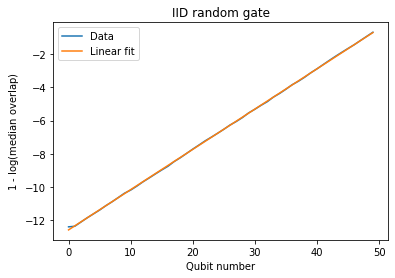

In [37]:
plt.plot(np.log(1-np.median(ps_nosame, axis=0)), label='Data')
plt.plot(np.arange(50)*lr.coef_[0] + lr.intercept_, label='Linear fit')
plt.legend()
plt.xlabel("Qubit number")
plt.ylabel("1 - $\log$(median overlap)")
plt.title("IID random gate")
plt.show()

(Recall that the 0-qubit is the closest one, so we have to reverse to measure distance).
So we have that if $o_k$ is the median overlap of the $k$-th qubit, then $-12.619907669096829 + (50-k)\cdot 0.2434308164409914 \approx \log(1-o_k)$. 
That is, 
$$1-o_k \approx e^{-0.448366847 - k\cdot 0.2434308164409914}$$

$$o_k \approx 1- e^{-0.448366847 - k\cdot 0.2434308164409914}$$

$$o_k \approx 1- 0.638670347\cdot (1.27561806)^{-k}$$
